# Detecting Animals 

Question

Is it possible for us to develop a model that can accurately classify images of animals?

# Unzipping data

In [ ]:
!unzip butterflies.zip
!unzip elephants.zip
!unzip horses.zip
!unzip chickens.zip
!unzip spiders.zip
!unzip squirrels.zip
!unzip dogs.zip

Archive:  butterflies.zip
replace butterflies/OIP-txVQnJyuNr2cqVWitwQM-wHaFU.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  elephants.zip
replace elephants/OIP-V46xF5Hs5kyRdw44VW8_DwHaE8.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  horses.zip
replace horses/OIP-U24DNUUALwspwB8ga4ZQgAHaEK.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  chickens.zip
replace chickens/OIP-xrAOu2XuZhTmkSJziRunrwHaFj.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  spiders.zip
replace spiders/OIP-xAsFeV_vJ-gpQqUIIZ_dnAHaF0.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  squirrels.zip
  inflating: squirrels/OIP-vvWp7sUf3E9NJn2pKYntNQHaD4.jpeg  
  inflating: squirrels/OIP-vWovTQPSWojyZaQPTevVaAAAAA.jpeg  
  inflating: squirrels/OIP-vwx9bSm37ihiVWqQUB3cyQHaEo.jpeg  
  inflating: squirrels/OIP-vXIe3Ehfh0H4ZiO-h90R0AHaFj.jpeg  
  inflating: squirrels/OIP-VxOo16Sez8kva0axKaihAAHaFE.jpeg  
  inflating: squirrels/OIP-VXViH2nd5GyiT51uR1Z_hQHaE6.jpeg  
  inflating: squirrels/OIP-vy_zni

In [ ]:
!unzip wolves.zip

Archive:  wolves.zip
  inflating: wolves/_106348479_mediaitem106348478.jpg  
  inflating: wolves/_109106949_meandkalani_photographeradelebarclay.jpg  
  inflating: wolves/09e95736-bfac-11e9-8f25-9b5536624008_image_hires_063817.jpg  
  inflating: wolves/1576008278152.jpeg  
  inflating: wolves/190307-grey-wolves.jpg  
  inflating: wolves/190607_wolves_full.jpg  
  inflating: wolves/41500552_303.jpg  
  inflating: wolves/45189092_303.jpg  
  inflating: wolves/49487066_303.jpg  
  inflating: wolves/5364145_062519-kgo-ov-wolf-pups-TN.jpg  
  inflating: wolves/5carpathianwolf_365181.jpg  
  inflating: wolves/61geOiQlBJL._SY355_.jpg  
  inflating: wolves/animal-1073857__480.jpg  
  inflating: wolves/animal-1836642__480.jpg  
  inflating: wolves/animal-3200168__480.jpg  
  inflating: wolves/animal-3473313__480.jpg  
  inflating: wolves/animal-3950960__480.jpg  
  inflating: wolves/animals-1060594__480.jpg  
  inflating: wolves/animal-world-3342258__480.jpg  
  inflating: wolves/animal-world-4

# Loading in the data

In [ ]:
from PIL import Image
import numpy as np
import os
import cv2
import random

random.seed(42)
data=[]
labels=[]

butterflies=os.listdir("butterflies")
for butterfly in butterflies:
    imag=cv2.imread("butterflies/"+butterfly)
    img_from_ar = Image.fromarray(imag, 'RGB')
    resized_image = img_from_ar.resize((150, 150))
    data.append(np.array(resized_image))
    labels.append(0)
horses=os.listdir("horses")
for horse in horses:
    imag=cv2.imread("horses/"+horse)
    img_from_ar = Image.fromarray(imag, 'RGB')
    resized_image = img_from_ar.resize((150, 150))
    data.append(np.array(resized_image))
    labels.append(1)
    
elephants=os.listdir("elephants")
for elephant in elephants:
    imag=cv2.imread("elephants/"+elephant)
    img_from_ar = Image.fromarray(imag, 'RGB')
    resized_image = img_from_ar.resize((150, 150))
    data.append(np.array(resized_image))
    labels.append(2)
chickens=os.listdir("chickens")
for chicken in chickens:
    imag=cv2.imread("chickens/"+chicken)
    img_from_ar = Image.fromarray(imag, 'RGB')
    resized_image = img_from_ar.resize((150, 150))
    data.append(np.array(resized_image))
    labels.append(3)
spiders=os.listdir("spiders")
for spider in spiders:
    imag=cv2.imread("spiders/"+spider)
    img_from_ar = Image.fromarray(imag, 'RGB')
    resized_image = img_from_ar.resize((150, 150))
    data.append(np.array(resized_image))
    labels.append(4)
squirrels=os.listdir("squirrels")
for squirrel in squirrels:
    imag=cv2.imread("squirrels/"+squirrel)
    img_from_ar = Image.fromarray(imag, 'RGB')
    resized_image = img_from_ar.resize((150, 150))
    data.append(np.array(resized_image))
    labels.append(5)
dogs=os.listdir("dogs")
for dog in dogs:
    imag=cv2.imread("dogs/"+dog)
    img_from_ar = Image.fromarray(imag, 'RGB')
    resized_image = img_from_ar.resize((150, 150))
    data.append(np.array(resized_image))
    labels.append(6)
wolves=os.listdir("wolves")
for wolf in wolves:
    imag=cv2.imread("wolves/"+wolf)
    img_from_ar = Image.fromarray(imag, 'RGB')
    resized_image = img_from_ar.resize((150, 150))
    data.append(np.array(resized_image))
    labels.append(7)


### Loading data as np array

In [ ]:
animals=np.array(data)
labels=np.array(labels)

In [ ]:
s=np.arange(animals.shape[0])
np.random.shuffle(s)
animals=animals[s]
labels=labels[s]

In [ ]:
num_classes=len(np.unique(labels))
data_length=len(animals)

### Split data 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(animals, labels, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=0)

### One Hot Encoding Labels

In [ ]:
import keras
from keras.utils import np_utils
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)
y_val=keras.utils.to_categorical(y_val,num_classes)

# Building Our own CNN Model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization
from keras.layers import InputLayer
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# define the model
def create_model(learning_rate=0.01, dropout_rate=0.0):
    model = Sequential()
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='softmax'))
    return model

# create the model


In [ ]:
model =create_model()
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model using validation set
history=model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_val, y_val))

Epoch 1/10
31/31 [==============================] - 9s 263ms/step - loss: 288.4055 - accuracy: 0.2311 - val_loss: 1.9311 - val_accuracy: 0.2715
Epoch 2/10
31/31 [==============================] - 8s 258ms/step - loss: 2.1404 - accuracy: 0.3218 - val_loss: 2.0165 - val_accuracy: 0.2927
Epoch 3/10
31/31 [==============================] - 8s 260ms/step - loss: 1.9565 - accuracy: 0.3992 - val_loss: 2.3224 - val_accuracy: 0.2537
Epoch 4/10
31/31 [==============================] - 8s 259ms/step - loss: 1.5701 - accuracy: 0.4623 - val_loss: 1.9766 - val_accuracy: 0.2927
Epoch 5/10
31/31 [==============================] - 8s 259ms/step - loss: 1.1172 - accuracy: 0.6261 - val_loss: 2.1148 - val_accuracy: 0.3382
Epoch 6/10
31/31 [==============================] - 8s 260ms/step - loss: 0.7816 - accuracy: 0.7536 - val_loss: 2.5413 - val_accuracy: 0.3561
Epoch 7/10
31/31 [==============================] - 8s 260ms/step - loss: 0.4742 - accuracy: 0.8586 - val_loss: 2.6836 - val_accuracy: 0.3659
Epoc

In [ ]:

# evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
train_loss,train_acc= model.evaluate(X_train,y_train)
val_loss,val_acc= model.evaluate(X_val,y_val)
print('Train accuracy:', 100*train_acc, "%")
print('Val accuracy:', 100*val_acc, "%")
print('Test accuracy:', 100*test_acc, "%")

20/20 [==============================] - 1s 29ms/step - loss: 4.1732 - accuracy: 0.3577
Train accuracy: 98.99219870567322 %
Val accuracy: 35.772356390953064 %
Test accuracy: 37.662336230278015 %


In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 10, -0.02, 5])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
def plot_accuracy(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training Accuracy")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Testing Accuracy")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 10, .85, 1])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.grid(True)
def plot_accuracy1(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training Accuracy")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Testing Accuracy")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 10, .10, 1])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.grid(True)

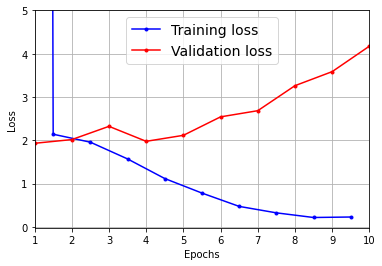

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])

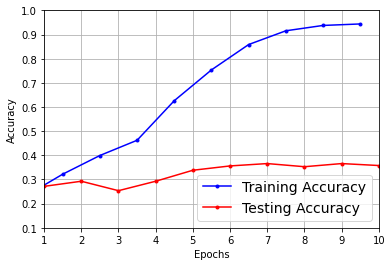

In [ ]:
plot_accuracy1(history.history["accuracy"], history.history["val_accuracy"])

Training Accuracy is very well but from the results of the validation and testing sets. The model is overfitting on the training set and not generilizing well. As a result we decided to use a pre trained model so that it will generilze well into our data.

# Pretrained VGG16 Model

The VGG16 architecture consists of:

*   13 convolutional layers
*   5 max pooling layers
*   3 fully connected layers
*   GlobalAveragePooling2D() layer
*   Dropout(0.2) layer
*   Dense(1024, activation='relu') layer
*   Dropout(0.2) layer
*   Dense(6, activation='softmax') layer as the final output layer.


So in total, it's 13 convolutional layers, 5 max pooling layers, 3 dense layers and 2 dropout layers.

The model is trained on the ImageNet dataset, which contains millions of images and thousands of object categories. Because of this, the model has learned rich feature representations for a wide variety of image-based tasks.





In [ ]:
# import the base model
from keras.applications import VGG16

# load the VGG16 model with the pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# freeze the layers of the pretrained model
base_model.trainable = False

# create new model on top
inputs = keras.layers.Input(shape=(150, 150, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(8, activation='softmax')(x)
model = keras.models.Model(inputs, outputs)


58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model using validation set
history=model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
49/49 [==============================] - 14s 212ms/step - loss: 1.3243 - accuracy: 0.8583 - val_loss: 1.1522 - val_accuracy: 0.8748
Epoch 2/10
49/49 [==============================] - 9s 175ms/step - loss: 0.6809 - accuracy: 0.9129 - val_loss: 0.8984 - val_accuracy: 0.8959
Epoch 3/10
49/49 [==============================] - 9s 176ms/step - loss: 0.4224 - accuracy: 0.9337 - val_loss: 0.5235 - val_accuracy: 0.9154
Epoch 4/10
49/49 [==============================] - 9s 176ms/step - loss: 0.3503 - accuracy: 0.9399 - val_loss: 0.4929 - val_accuracy: 0.9301
Epoch 5/10
49/49 [==============================] - 9s 178ms/step - loss: 0.1891 - accuracy: 0.9551 - val_loss: 0.6715 - val_accuracy: 0.9154
Epoch 6/10
49/49 [==============================] - 9s 178ms/step - loss: 0.3499 - accuracy: 0.9366 - val_loss: 0.5417 - val_accuracy: 0.9106
Epoch 7/10
49/49 [==============================] - 9s 181ms/step - loss: 0.1697 - accuracy: 0.9597 - val_loss: 0.4829 - val_accuracy: 0.9122
Epoch

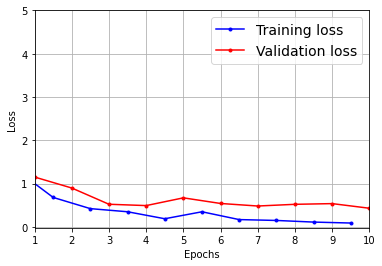

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])

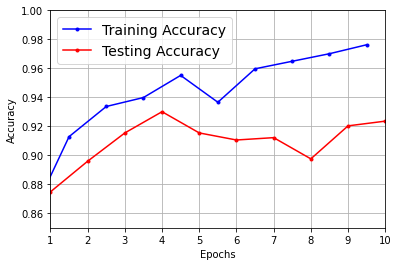

In [ ]:
plot_accuracy(history.history["accuracy"], history.history["val_accuracy"])

#### Evaluation 

In [ ]:
# evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', 100*test_acc, "%")

Test accuracy: 94.15584206581116 %


In [ ]:
import pandas as pd
data = {'Model': ['Team 6 CNN', 'VGG16'],
        'Train': ['99%','97.7%'],
        'Validation': ['40%','97.7%'],
        'Test': ['32.2%','91.2%']
        }

df=pd.DataFrame(data)

print(df)


        Model  Train Validation   Test
0  Team 6 CNN    99%        40%  32.2%
1       VGG16  97.7%      97.7%  91.2%
